In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("electricity_cost_dataset.csv")
data.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0


In [3]:
data["structure type"].unique()

array(['Mixed-use', 'Residential', 'Commercial', 'Industrial'],
      dtype=object)

In [4]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

In [5]:
encoded_structure_type=encoder.fit_transform(data[["structure type"]]).toarray().astype(int)

In [6]:
encoded_structure_type

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]], shape=(10000, 4))

In [7]:
stDf=pd.DataFrame(encoded_structure_type,columns=encoder.get_feature_names_out(["structure type"]))

In [8]:
data=pd.concat([data,stDf],axis=1)

In [9]:
data.drop(columns=["structure type"],inplace=True)


In [10]:
data.head()

,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost,structure type_Commercial,structure type_Industrial,structure type_Mixed-use,structure type_Residential
0,1360,2519.0,69,52,188,1,72,1420.0,0,0,1,0
1,4272,2324.0,50,76,165,65,261,3298.0,0,0,1,0
2,3592,2701.0,20,94,198,39,117,3115.0,0,0,1,0
3,966,1000.0,13,60,74,3,35,1575.0,0,0,0,1
4,4926,5990.0,23,65,32,57,185,4301.0,0,0,0,1


In [11]:
corr_matrix=data.corr()
corr_matrix

,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost,structure type_Commercial,structure type_Industrial,structure type_Mixed-use,structure type_Residential
site area,1.000000,0.745372,0.006786,0.019681,-0.003770,0.007520,0.360160,0.874376,-0.009706,-0.007907,0.018154,-0.001033
water consumption,0.745372,1.000000,0.006977,0.008711,0.000929,0.007786,0.281256,0.698775,-0.000233,-0.013696,0.002704,0.006408
recycling rate,0.006786,0.006977,1.000000,-0.022350,-0.011125,-0.005641,-0.008540,-0.012536,0.021868,0.006087,-0.023189,-0.005097
utilisation rate,0.019681,0.008711,-0.022350,1.000000,-0.008747,-0.000795,0.012424,0.207215,-0.007545,0.002613,-0.001142,0.006416
air qality index,-0.003770,0.000929,-0.011125,-0.008747,1.000000,-0.027277,0.013728,0.017376,-0.023902,-0.004878,0.011527,0.015901
issue reolution time,0.007520,0.007786,-0.005641,-0.000795,-0.027277,1.000000,-0.014663,0.042325,0.012545,0.014615,-0.001286,-0.019698
resident count,0.360160,0.281256,-0.008540,0.012424,0.013728,-0.014663,1.000000,0.361609,-0.519950,-0.265018,0.264484,0.432285
electricity cost,0.874376,0.698775,-0.012536,0.207215,0.017376,0.042325,0.361609,1.000000,-0.015181,0.168785,-0.244613,0.112606
structure type_Commercial,-0.009706,-0.000233,0.021868,-0.007545,-0.023902,0.012545,-0.519950,-0.015181,1.000000,-0.218963,-0.333034,-0.528383
structure type_Industrial,-0.007907,-0.013696,0.006087,0.002613,-0.004878,0.014615,-0.265018,0.168785,-0.218963,1.000000,-0.169747,-0.269317


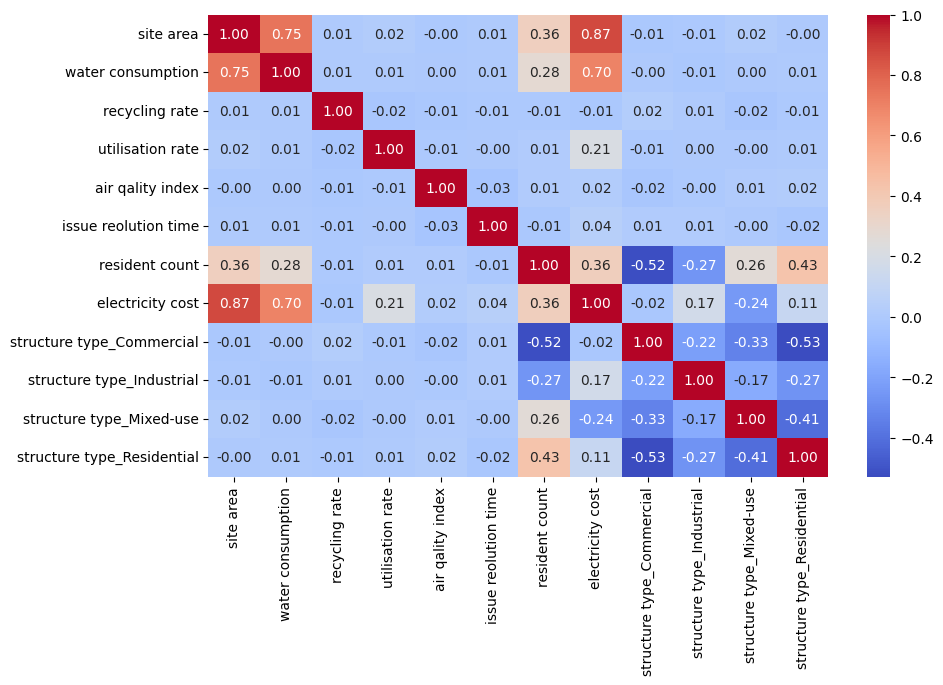

In [12]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.show()

In [13]:
data.isnull().sum()

site area                     0
water consumption             0
recycling rate                0
utilisation rate              0
air qality index              0
issue reolution time          0
resident count                0
electricity cost              0
structure type_Commercial     0
structure type_Industrial     0
structure type_Mixed-use      0
structure type_Residential    0
dtype: int64

Text(0, 0.5, 'Electricity Cost')

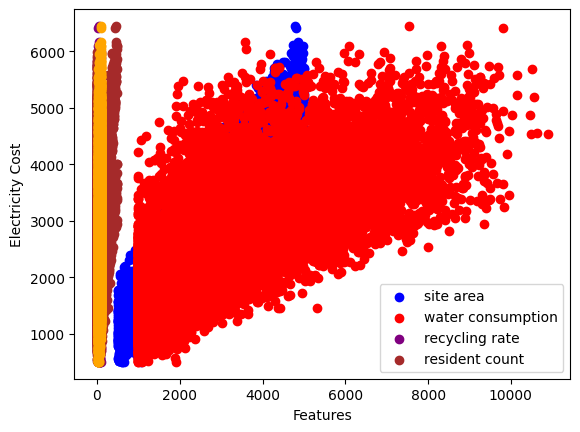

In [14]:
plt.scatter(x=data["site area"],y=data["electricity cost"],color="blue")
plt.scatter(x=data["water consumption"],y=data["electricity cost"],color="red")


plt.scatter(x=data["recycling rate"],y=data["electricity cost"],color="purple")
plt.scatter(x=data["resident count"],y=data["electricity cost"],color="brown")
plt.scatter(x=data["utilisation rate"],y=data["electricity cost"],color="orange")

plt.legend(["site area","water consumption","recycling rate","resident count"])
plt.xlabel("Features")
plt.ylabel("Electricity Cost")

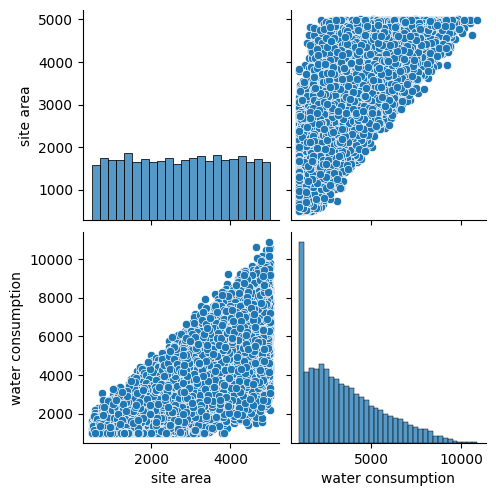

In [15]:
sns.pairplot(data[["site area","water consumption"]])
plt.show()


In [16]:
X=data[["site area","water consumption"]]
y=data["electricity cost"]

In [17]:
X.head()

,site area,water consumption
0,1360,2519.0
1,4272,2324.0
2,3592,2701.0
3,966,1000.0
4,4926,5990.0


In [18]:
y.head()

0    1420.0
1    3298.0
2    3115.0
3    1575.0
4    4301.0
Name: electricity cost, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [21]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [22]:
X_train

array([[ 1.65586727,  2.26016181],
       [-0.47371779, -0.90071184],
       [ 0.18189683, -0.53898876],
       ...,
       [-1.24015142, -1.13417455],
       [-0.99371472, -0.98429726],
       [-0.49541662, -0.9674841 ]], shape=(8000, 2))

In [23]:
X_test

array([[-1.02238818, -1.20238793],
       [-1.47341383, -1.20238793],
       [ 0.28264139,  0.48229047],
       ...,
       [ 0.12764975,  0.50486814],
       [ 0.6863946 , -0.66436688],
       [-1.67567792, -1.01023756]], shape=(2000, 2))

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regression=LinearRegression()

In [26]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
y_pred=regression.predict(X_test)


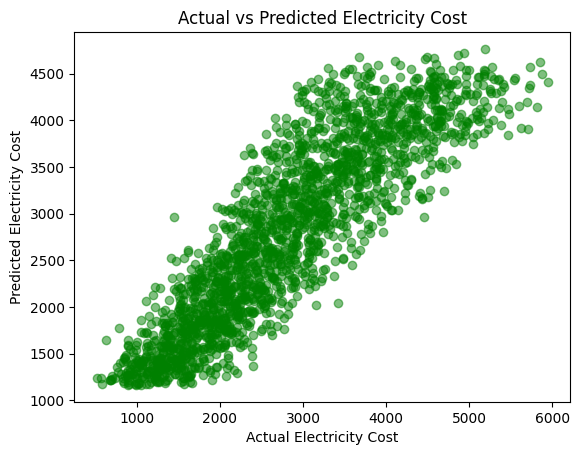

In [28]:
plt.scatter(y_test, y_pred, alpha=0.5, color="green")
plt.xlabel("Actual Electricity Cost")
plt.ylabel("Predicted Electricity Cost")
plt.title("Actual vs Predicted Electricity Cost")
plt.show()

In [29]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_scores=cross_val_score(regression,X_train,y_train,scoring="neg_mean_absolute_error",cv=5)
validation_scores

array([-417.79150437, -423.40143831, -415.29113002, -414.44041085,
       -420.7153737 ])

In [30]:
positive_scores=-validation_scores
np.mean(positive_scores)

np.float64(418.3279714472716)

In [ ]:
#performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)
419.0086810350617
280444.40782588563
529.5700216457552
0.7751936154380824

419.0086810350617
280444.40782588563
529.5700216457552
0.7751936154380824


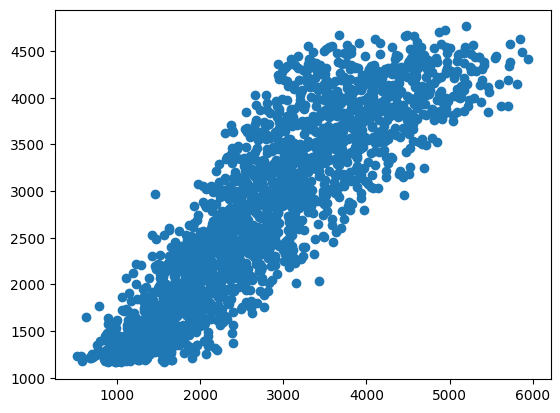

In [32]:
plt.scatter(y_test,y_pred)

In [33]:
resudeals=y_test-y_pred
print(resudeals)

6252     221.251332
4684     333.310745
1731    1083.458185
4742     318.969126
4521     218.697052
           ...     
6412     350.874300
8285     908.099957
7853    -705.472305
1095    -262.590281
6929    -557.414826
Name: electricity cost, Length: 2000, dtype: float64


Text(0.5, 1.0, 'Distribution of Residuals')

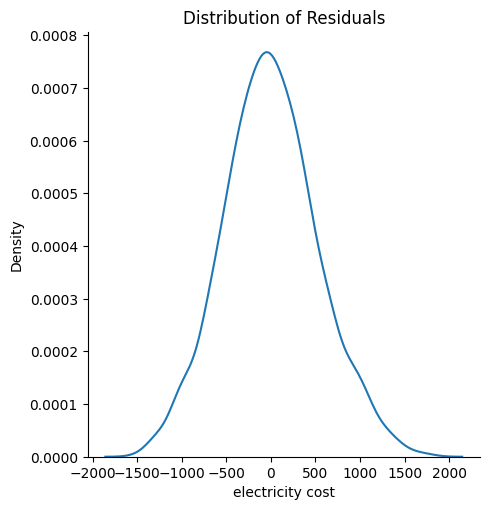

In [34]:
sns.displot(resudeals,kind="kde")
plt.title("Distribution of Residuals")

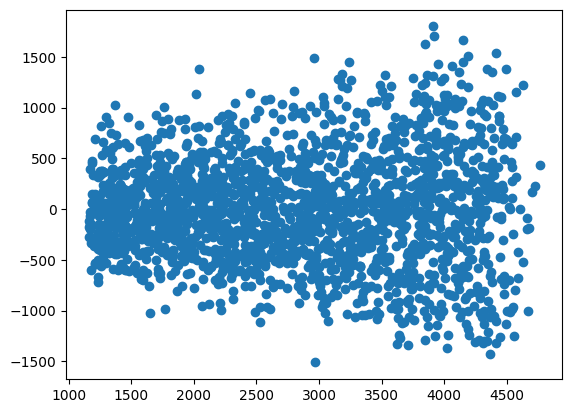

In [35]:
plt.scatter(y_pred,resudeals)

In [36]:
newdata=np.array([[1360,2519.0]])

In [37]:
newscaled=scaler.transform(newdata)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
predicted_price=regression.predict(newscaled)
print(predicted_price[0])

1833.6234532826616


In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3,include_bias=True)

In [40]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [41]:
regression2=LinearRegression()
regression2.fit(X_train_poly,y_train)
y_pred2=regression2.predict(X_test_poly)
score2=r2_score(y_test,y_pred2)
score2

0.7748626647263195